# Visualisation

## Setup

### Imports

In [34]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import logging

from amftrack.util.image_analysis import get_transformation
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    plot_edge,
    find_nearest_edge,
    get_all_edges,
    plot_full_image_with_features,
)

from amftrack.pipeline.functions.image_processing.experiment_util import (
    find_neighboring_edges,
)

from amftrack.util.geometry import (
    generate_index_along_sequence,
    distance_point_pixel_line,
    get_closest_lines,
)

from amftrack.util.sys import storage_path

from amftrack.util.sys import (
    storage_path,
    get_current_folders_local,
    update_plate_info_local,
)
from amftrack.util.file import chose_file
from amftrack.util.plot import show_image
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    Node,
    Edge,
)
from amftrack.util.image_analysis import get_transformation
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    plot_edge,
    find_nearest_edge,
    get_all_edges,
    plot_full_image_with_features,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    find_neighboring_edges,
)
from amftrack.util.geometry import (
    generate_index_along_sequence,
    distance_point_pixel_line,
    get_closest_lines,
)
from amftrack.util.sys import (
    storage_path,
    get_current_folders_local,
    update_plate_info_local,
)
from amftrack.util.file import chose_file
from amftrack.util.plot import show_image

from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    plot_edge_width,
    reconstruct_image_from_general,
)

from amftrack.util.geometry import (
    distance_point_pixel_line,
    get_closest_line_opt,
    get_closest_lines,
    format_region,
    intersect_rectangle,
    get_overlap,
    get_bounding_box,
    expand_bounding_box,
    is_in_bounding_box,
    centered_bounding_box,
)
from amftrack.pipeline.launching.run_super import (
    directory_scratch,
)
from amftrack.util.sys import (
    update_analysis_info,
    get_analysis_info,
)
import pickle

#%matplotlib notebook
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    load_graphs,
    save_graphs,
)

In [2]:
from amftrack.pipeline.functions.image_processing.experiment_util import plot_full

### Loading the plate

In [20]:
directory_name = "plate_938"
# plate_name = "20220325_1423_Plate907"
directory = os.path.join(storage_path, "test", directory_name) + "/"
# directory = os.path.join(directory_scratch,'stitch_temp')+'/'

update_plate_info_local(directory)
folder_df = get_current_folders_local(directory)
folder_df["unique_id"] = 10000

FileNotFoundError: [Errno 2] No such file or directory: '/scratch-shared/amftrack/temp/test/plate_938/'

In [115]:
exp = Experiment(directory)
exp.load(folder_df)

2022-03-25 21:42:00
1
2022-04-01 20:49:00
1
2022-04-09 05:52:00
1


***Alternative way***

In [31]:
directory = os.path.join(directory_scratch, "stitch_temp") + "/"
update_analysis_info(directory)
analysis_info = get_analysis_info(directory)
plates = ["1053_20220413"]
select = analysis_info.loc[analysis_info["unique_id"].isin(plates)]
path_exp = os.path.join(directory, select["path_exp"].iloc[0])
exp = pickle.load(open(path_exp, "rb"))

In [102]:
from amftrack.util.sys import test_path, update_plate_info, get_current_folders


def make_experiment_object_multi():
    "Build an experiment object using the plate that is in the test repository."
    directory = os.path.join(test_path, "plate_938")
    update_plate_info_local(directory)
    folder_df = get_current_folders_local(directory)
    print(len(folder_df))
    folder_df["unique_id"] = 10000
    exp = Experiment(directory)
    exp.load(folder_df, suffix="")
    for t in range(len(exp.folders)):
        exp.load_tile_information(t)
    return exp

In [103]:
e = make_experiment_object_multi()

3
2022-03-25 21:42:00
1
2022-04-01 20:49:00
1
2022-04-09 05:52:00
1
1
1
1


### Visualisation

In [55]:
len(exp.nx_graph[0])

619

In [56]:
len(exp.nx_graph[1])

2212

In [7]:
len(exp.nx_graph[2])

2754

In [8]:
exp.image_transformation

[None, None, None]

In [9]:
exp.load_tile_information(0)
exp.load_tile_information(1)
exp.load_tile_information(2)

1
1
1


In [10]:
exp.get_rotation(2)

1


0.08489807360483184

## Timestep plot function

In [11]:
region1 = [[12000, 15000], [26000, 30000]]
region2 = [[22000, 25000], [24000, 27000]]
region3 = [[22000, 15000], [24000, 19000]]

1


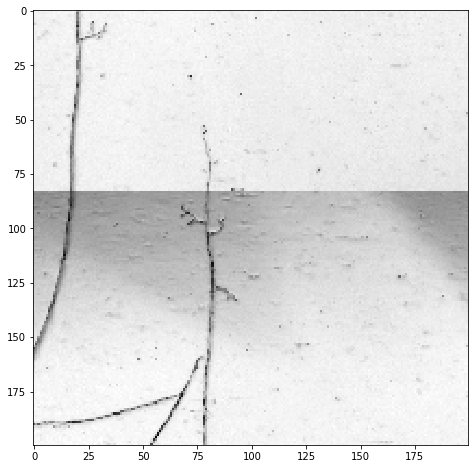

In [12]:
plot_full_image_with_features(
    exp,
    0,
    downsizing=10,
    region=region2,
    # points=[[11191, 39042], [11923, 45165]],
    # segments=[[[11191, 39042], [11923, 45165]]],
    nodes=[Node(10, exp), Node(100, exp), Node(200, exp)],
    edges=[get_random_edge(exp), get_random_edge(exp)],
    dilation=1,
)

1
1


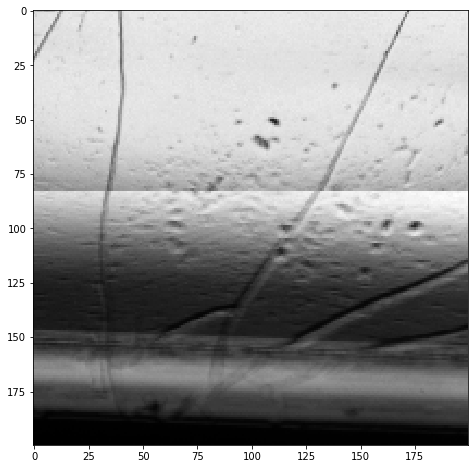

In [13]:
t = 1
exp.load_tile_information(1)
plot_full_image_with_features(
    exp,
    t,
    downsizing=10,
    region=region2,
    # points=[[11191, 39042], [11923, 45165]],
    # segments=[[[11191, 39042], [11923, 45165]]],
    # nodes=[Node(10, exp), Node(100, exp), Node(200, exp)],
    edges=[get_random_edge(exp, t), get_random_edge(exp, t)],
    dilation=1,
)

1


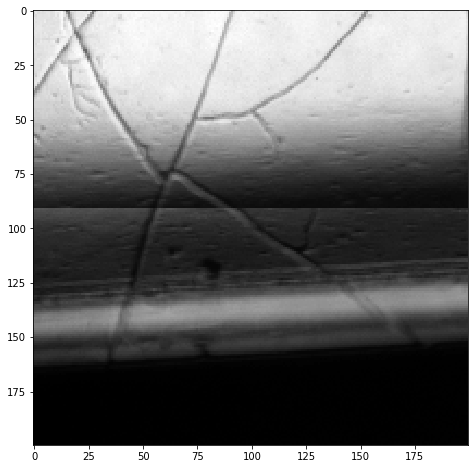

In [14]:
t = 2
exp.load_tile_information(t)
plot_full_image_with_features(
    exp,
    t,
    downsizing=10,
    region=region2,
    # points=[[11191, 39042], [11923, 45165]],
    # segments=[[[11191, 39042], [11923, 45165]]],
    # nodes=[Node(10, exp), Node(100, exp), Node(200, exp)],
    edges=[get_random_edge(exp, t), get_random_edge(exp, t)],
    dilation=1,
)

## Using Timestep function with general coords

In [15]:
region = region3

In [16]:
def conversion(t, region):
    point1 = exp.general_to_timestep(region[0], t)
    point2 = exp.general_to_timestep(region[1], t)
    return [point1, point2]

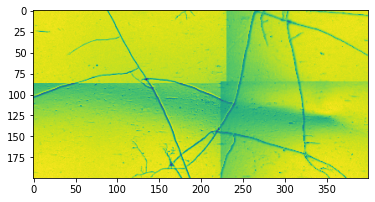

In [17]:
im1, _ = reconstruct_image(
    exp,
    0,
    downsizing=10,
    region=region3,
    white_background=True,
)
plt.imshow(im1)

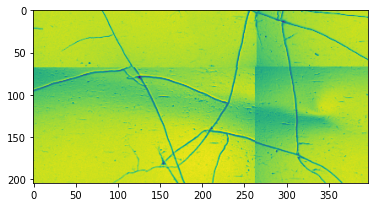

In [47]:
im2, _ = reconstruct_image(
    exp,
    1,
    downsizing=10,
    region=conversion(1, region3),
    white_background=True,
)
plt.imshow(im2)

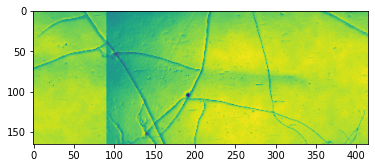

In [48]:
im3, _ = reconstruct_image(
    exp,
    2,
    downsizing=10,
    region=conversion(2, region3),
    white_background=True,
)
plt.imshow(im3)

In [18]:
im1.shape

(200, 200)

In [19]:
im2.shape

(202, 197)

In [20]:
im3.shape

(182, 216)

## Vérification des transformation

### Test 1

In [105]:
point1 = [20870, 15000]
point = point1

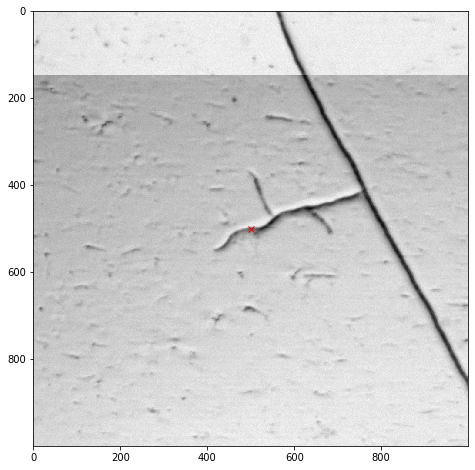

In [109]:
plot_full_image_with_features(
    exp,
    0,
    downsizing=1,
    region=conversion(0, centered_bounding_box(point, size=1000)),
    points=[exp.general_to_timestep(point, 0)],
    dilation=1,
)

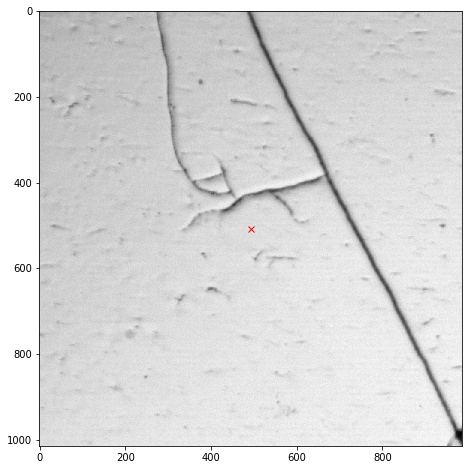

In [110]:
plot_full_image_with_features(
    exp,
    1,
    downsizing=1,
    region=conversion(1, centered_bounding_box(point, size=1000)),
    points=[exp.general_to_timestep(point, 1)],
    dilation=1,
)

### Test 2: Avec des nodes

In [19]:
nodes = get_all_nodes(exp, 0)

In [20]:
len(nodes)

619

258
20
256

In [21]:
my_nodes = [Node(20, exp), Node(258, exp), Node(256, exp)]

In [22]:
my_nodes[0].ts()

[0, 1, 2]

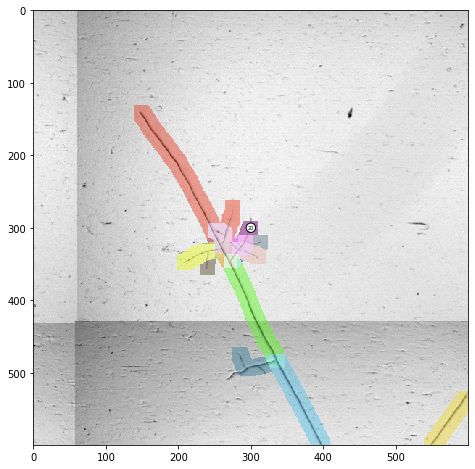

In [16]:
t = 0
i = 0
pos = exp.general_to_timestep(my_nodes[i].pos(t), t)
region = centered_bounding_box(pos, size=3000)
plot_full_image_with_features(
    exp,
    t,
    region=region,
    downsizing=5,
    nodes=[my_nodes[i]],
    edges=get_all_edges(exp, t),
    dilation=20,
    prettify=False,
    # save_path=os.path.join(test_path, "test_region_centered"),
)

In [17]:
my_nodes[i].pos(0)

array([19871, 15080])

In [18]:
my_nodes[i].pos(1)

array([19520, 14795])

In [19]:
my_nodes[i].pos(2)

array([19364, 14852])

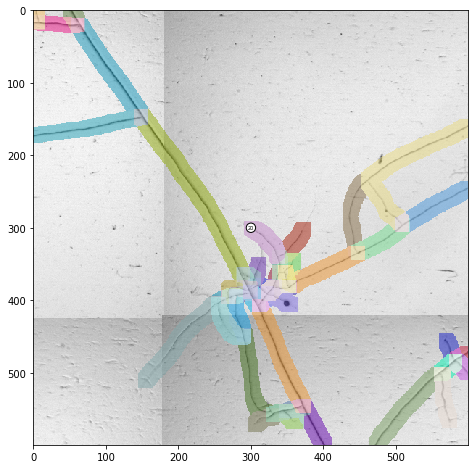

In [23]:
t = 1
i = 0
pos = exp.general_to_timestep(my_nodes[i].pos(t), t)
region = centered_bounding_box(pos, size=3000)
plot_full_image_with_features(
    exp,
    t,
    region=region,
    downsizing=5,
    nodes=[my_nodes[i]],
    edges=get_all_edges(exp, t),
    dilation=20,
    prettify=False,
    # save_path=os.path.join(test_path, "test_region_centered"),
)

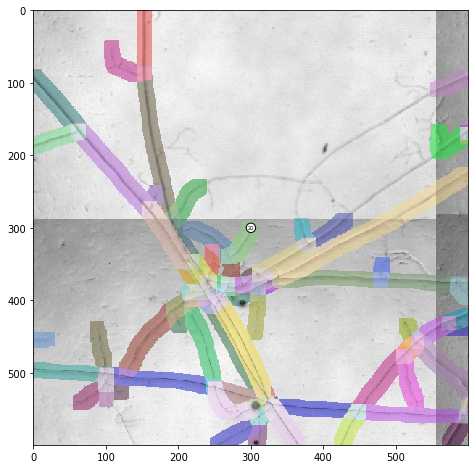

In [26]:
t = 2
i = 0
pos = exp.general_to_timestep(my_nodes[i].pos(t), t)
region = centered_bounding_box(pos, size=3000)
plot_full_image_with_features(
    exp,
    t,
    region=region,
    downsizing=5,
    nodes=[my_nodes[i]],
    edges=get_all_edges(exp, t),
    dilation=20,
    prettify=False,
    # save_path=os.path.join(test_path, "test_region_centered"),
)

### Test reconstruct_image

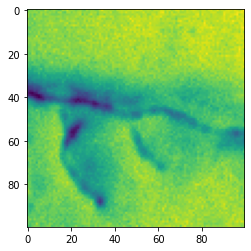

In [155]:
t = 0
i = 1
pos = exp.general_to_timestep(my_nodes[i].pos(t), t)
region = centered_bounding_box(pos, size=100)
im_test, _ = reconstruct_image(
    exp,
    t,
    downsizing=1,
    region=region,
)
plt.imshow(im_test)

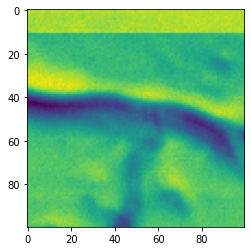

In [156]:
t = 1
i = 1
pos = exp.general_to_timestep(my_nodes[i].pos(t), t)
region = centered_bounding_box(pos, size=100)
im_test, _ = reconstruct_image(
    exp,
    t,
    downsizing=1,
    region=region,
)
plt.imshow(im_test)

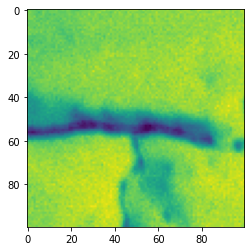

In [157]:
t = 2
i = 1
pos = exp.general_to_timestep(my_nodes[i].pos(t), t)
region = centered_bounding_box(pos, size=100)
im_test, _ = reconstruct_image(
    exp,
    t,
    downsizing=1,
    region=region,
)
plt.imshow(im_test)

## New general function

In [27]:
region = region3

In [32]:
%load_ext autoreload
%autoreload 2

In [33]:
%reload_ext autoreload

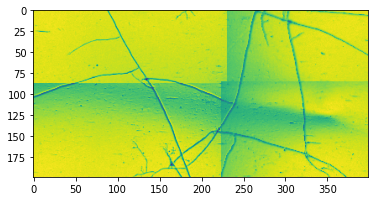

In [28]:
im1_, _ = reconstruct_image_from_general(
    exp,
    0,
    downsizing=10,
    region=region,
    white_background=True,
)
plt.imshow(im1_)

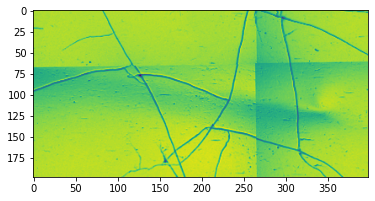

In [29]:
im2_, _ = reconstruct_image_from_general(
    exp,
    1,
    downsizing=10,
    region=region3,
    white_background=True,
)
plt.imshow(im2_)

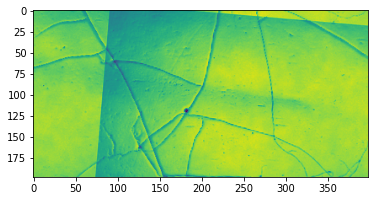

In [30]:
im3_, _ = reconstruct_image_from_general(
    exp,
    2,
    downsizing=10,
    region=region3,
    white_background=True,
)
plt.imshow(im3_)

In [27]:
im1_.shape

(199, 199)

In [28]:
im2_.shape

(198, 198)

In [31]:
im3_.shape

(199, 199)

# Test nouvelle fonction de plot

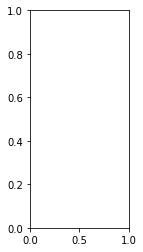

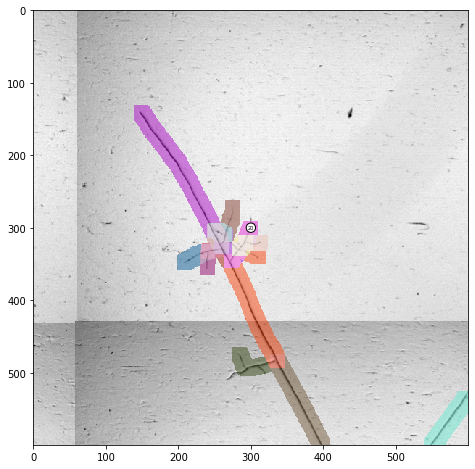

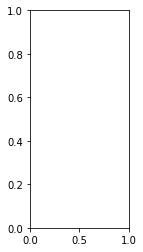

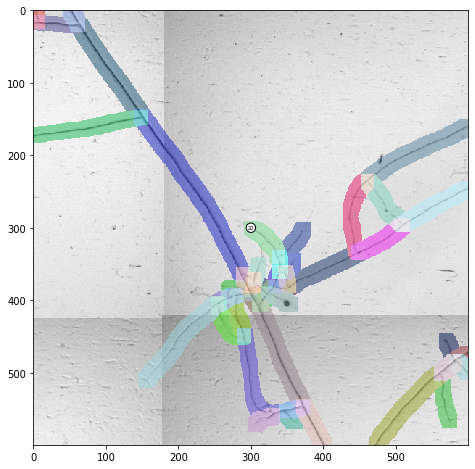

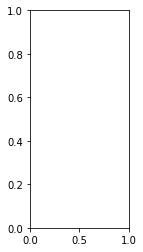

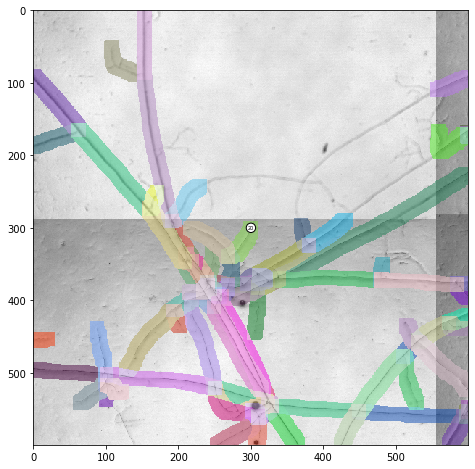

In [45]:
i = 0
for t in range(3):
    pos = exp.general_to_timestep(my_nodes[i].pos(t), t)
    region = centered_bounding_box(pos, size=3000)
    plot_full_image_with_features(
        exp,
        t,
        region=region,
        downsizing=5,
        nodes=[my_nodes[i]],
        edges=get_all_edges(exp, t),
        dilation=5,
        prettify=False,
        # save_path=os.path.join(test_path, "test_region_centered"),
    )

In [40]:
region = region2

In [41]:
from importlib import reload  # python 2.7 does not require this
import amftrack.pipeline.functions.image_processing.experiment_util

reload(amftrack.pipeline.functions.image_processing.experiment_util)
from amftrack.pipeline.functions.image_processing.experiment_util import plot_full

In [105]:
i = 1
for t in range(3):
    pos = my_nodes[i].pos(t)
    print(pos)

[22617 24276]
[22561 24158]
[22385 23865]


# POUR CORENTIN

In [41]:
load_graphs(exp, [0, 1, 2])

In [42]:
from random import choice

nodes = get_all_nodes(exp, 0)
nodes = [
    node
    for node in nodes
    if node.is_in(0)
    and np.linalg.norm(node.pos(0) - node.pos(node.ts()[-1])) > 1000
    and len(node.ts()) > 3
]
my_nodes = [choice(nodes) for k in range(5)]

In [43]:
for t in range(3):
    exp.load_tile_information(t)

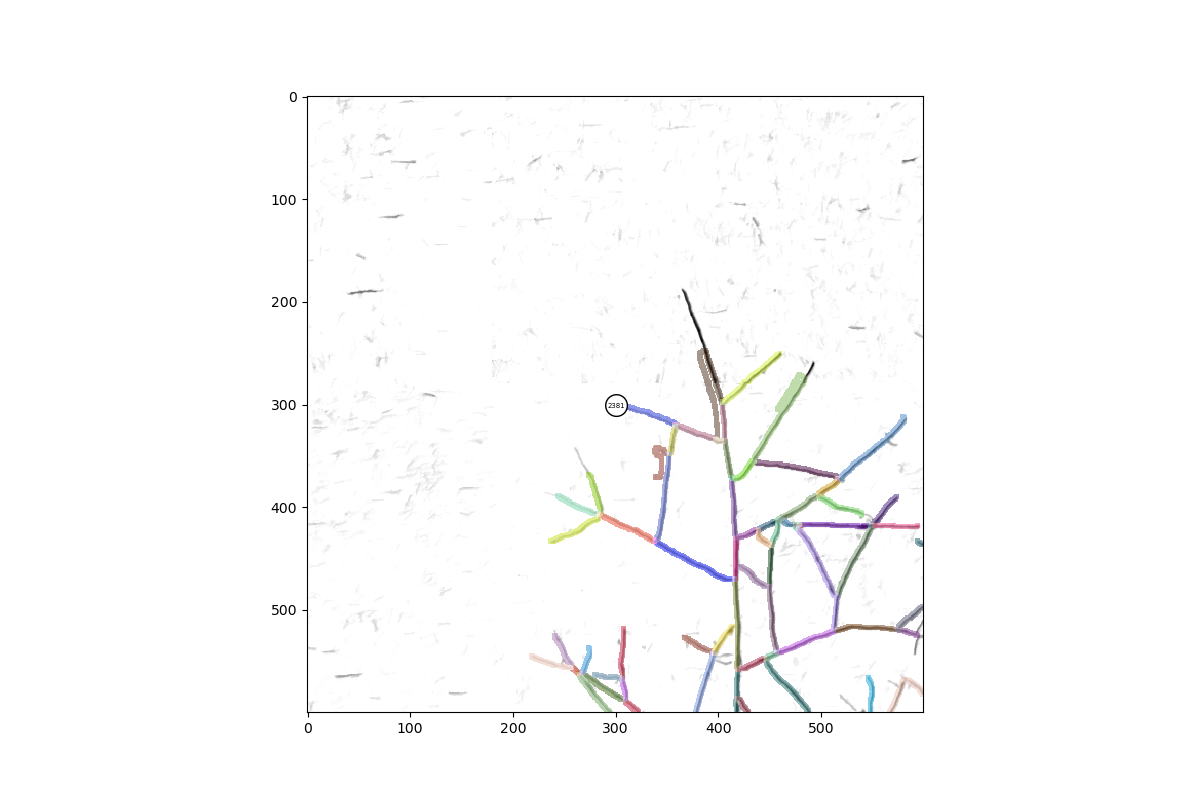

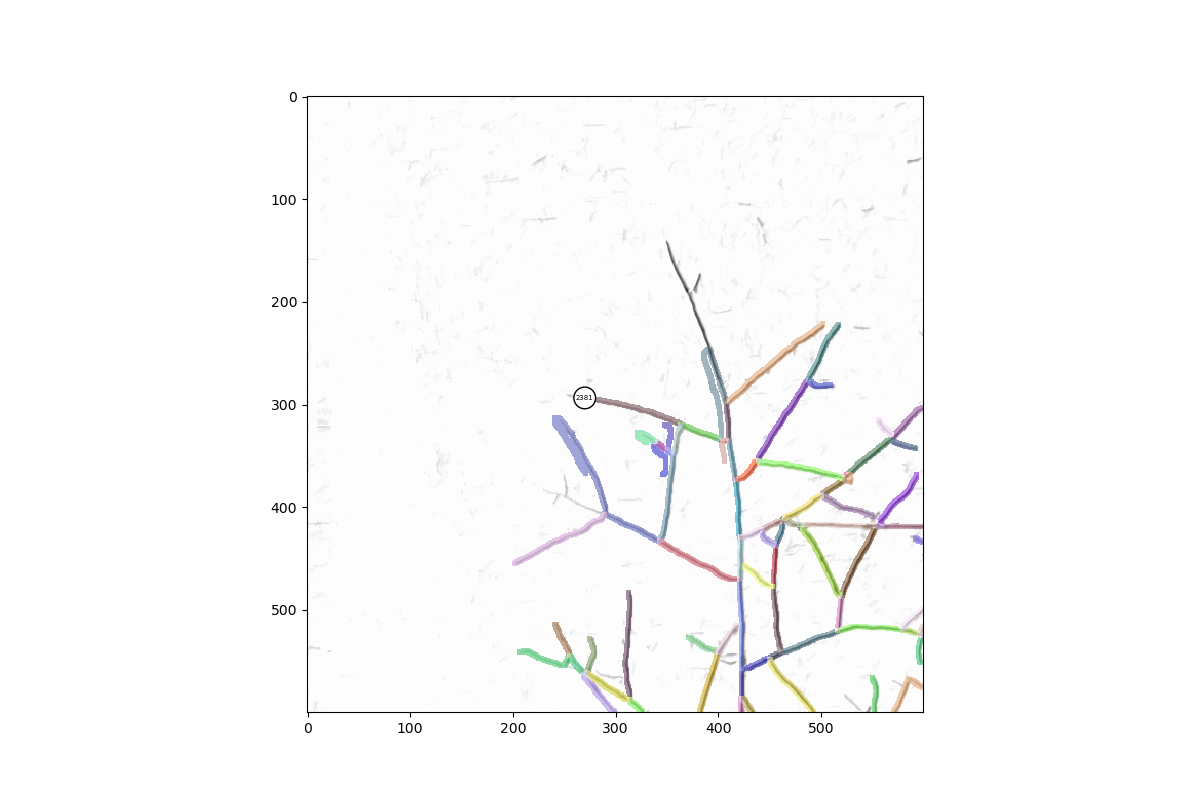

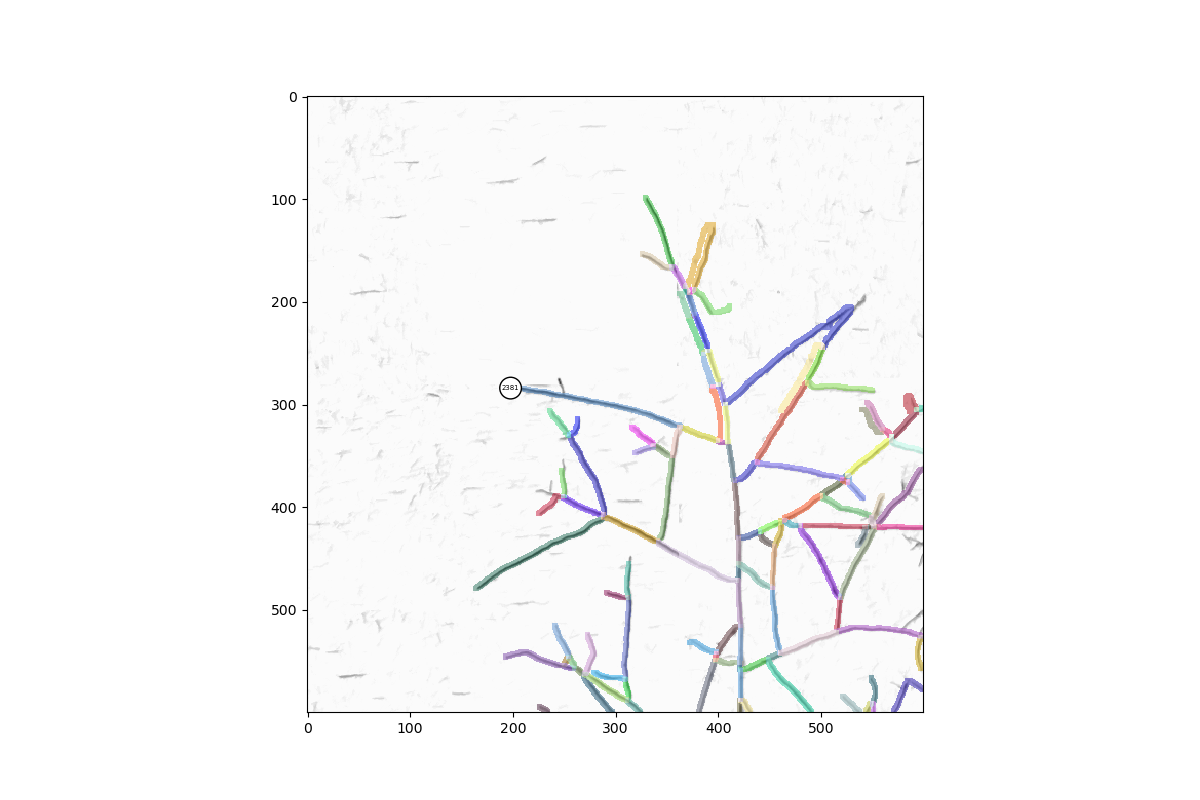

In [46]:
%matplotlib widget
i = 1
pos = my_nodes[i].pos(0)
region = centered_bounding_box(pos, size=3000)
for t in range(3):
    pos = my_nodes[i].pos(t)
    # region = centered_bounding_box(pos, size=3000)
    plot_full(
        exp,
        t,
        region=region,
        downsizing=5,
        nodes=[my_nodes[i]],
        edges=get_all_edges(exp, t),
        dilation=5,
        prettify=True,
        # save_path=os.path.join(test_path, "test_region_centered"),
    )

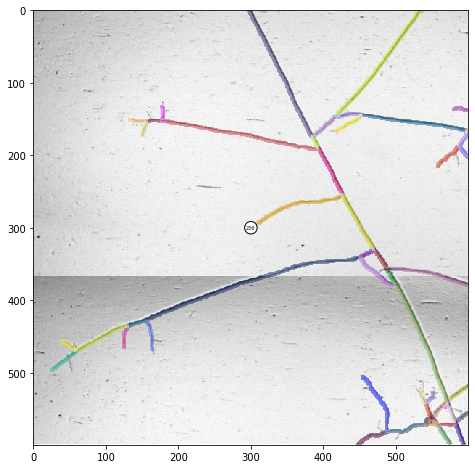

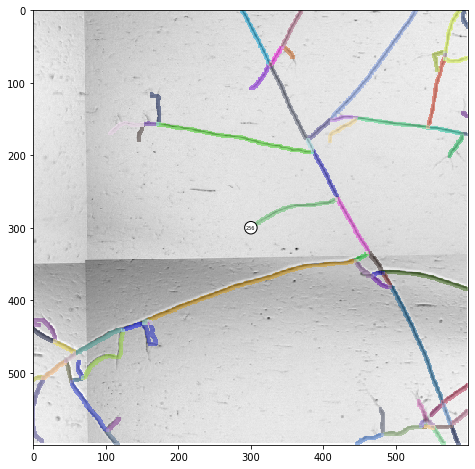

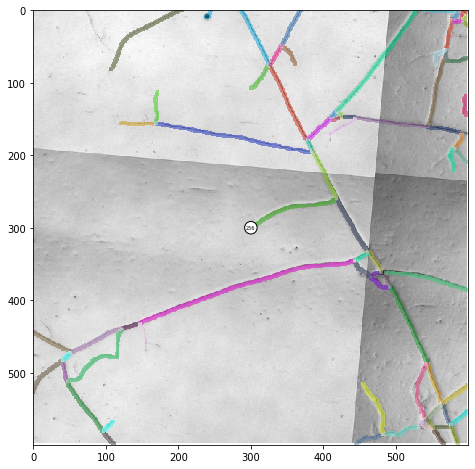

In [51]:
i = 2
for t in range(3):
    pos = my_nodes[i].pos(t)
    region = centered_bounding_box(pos, size=3000)
    plot_full(
        exp,
        t,
        region=region,
        downsizing=5,
        nodes=[my_nodes[i]],
        edges=get_all_edges(exp, t),
        dilation=5,
        prettify=False,
        # save_path=os.path.join(test_path, "test_region_centered"),
    )

In [119]:
exp.load_compressed_skel()

In [135]:
exp.dates

[Timestamp('2022-03-25 21:42:00'),
 Timestamp('2022-04-01 20:49:00'),
 Timestamp('2022-04-09 05:52:00')]

<IPython.core.display.Javascript object>


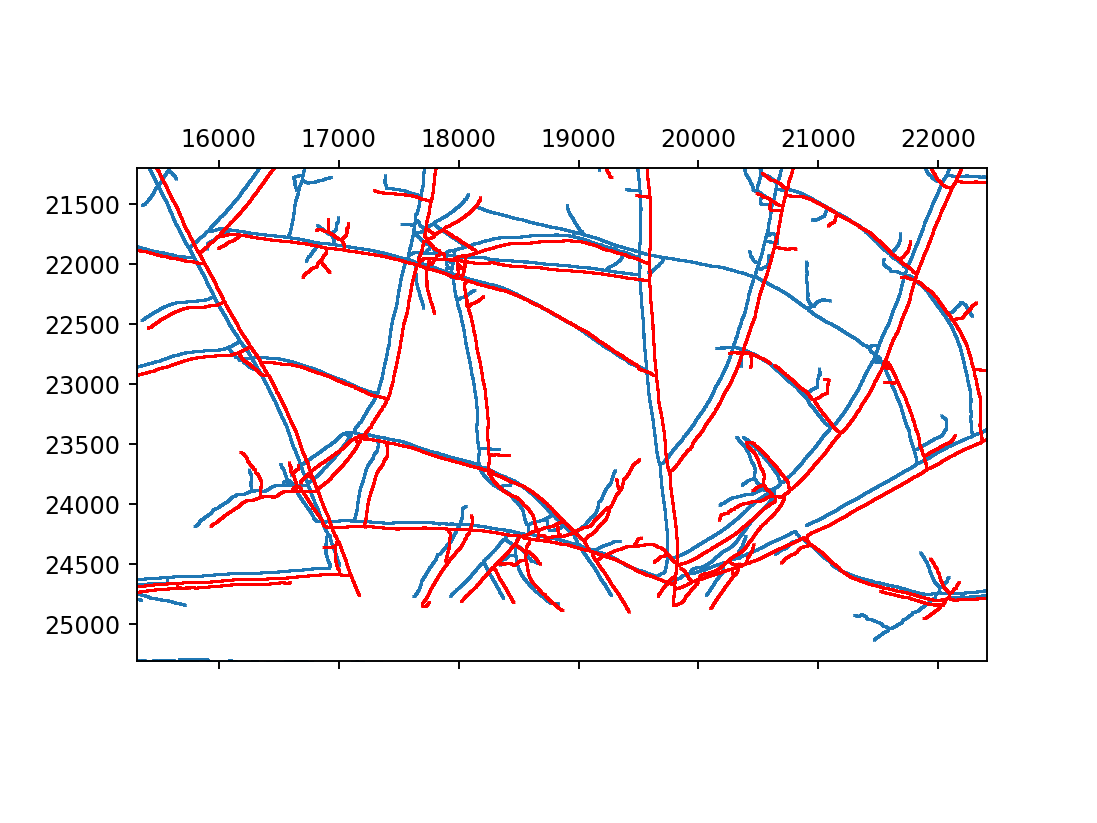

In [132]:
%matplotlib notebook
plt.spy(exp.skeletons[1], markersize=0.01)
plt.spy(exp.skeletons[0], markersize=0.01, color="red")

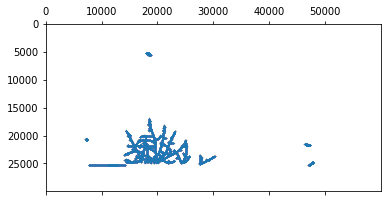

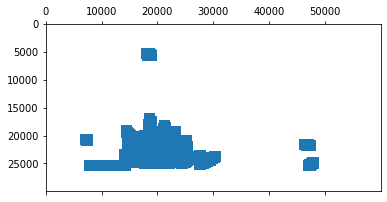

In [122]:
plt.spy(exp.skeletons[0])

In [121]:
exp.skeletons

[<30000x60000 sparse matrix of type '<class 'numpy.bool_'>'
 	with 163483 stored elements in Dictionary Of Keys format>,
 <30000x60000 sparse matrix of type '<class 'numpy.bool_'>'
 	with 954711 stored elements in Dictionary Of Keys format>,
 <30000x60000 sparse matrix of type '<class 'numpy.bool_'>'
 	with 1164050 stored elements in Dictionary Of Keys format>]

In [117]:
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    load_graphs,
    save_graphs,
)

In [118]:
save_graphs(exp)

1
2022-03-25 21:42:00 True
1
2022-04-01 20:49:00 True
1
2022-04-09 05:52:00 True


In [41]:
from importlib import reload  # python 2.7 does not require this
import amftrack.pipeline.functions.image_processing.experiment_class_surf

reload(amftrack.pipeline.functions.image_processing.experiment_util)
from amftrack.pipeline.functions.image_processing.experiment_util import plot_full